## Space Titanic Kaggle Challeng

In [1]:
# libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Loading data

In [2]:
# importing datasets

path_test = r'.\test.csv'
path_train = r'.\train.csv'

test_raw_df = pd.read_csv(path_test)
train_raw_df = pd.read_csv(path_train)

In [3]:
test_raw_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [4]:
train_raw_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


I like to combine DataFrames to perform feature engineering. This way, for future model training, both test and train datasets will be in the same format

We'll split them again before modeling some machine learn stuff...

In [5]:
train_raw_df['dataset'] = 'train'
test_raw_df['dataset'] = 'test'

In [6]:
combined_df = pd.concat([train_raw_df, test_raw_df], axis=0, ignore_index=True)
combined_df # combine datasets for EDA and processing. 

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,dataset
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,train
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,train
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,train
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,train
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,test
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,test
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,test
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,test


In [7]:
# finding NaNs
combined_df.isnull().sum().sort_values(ascending=False)

Transported     4277
CryoSleep        310
ShoppingMall     306
Cabin            299
VIP              296
Name             294
FoodCourt        289
HomePlanet       288
Spa              284
Destination      274
Age              270
VRDeck           268
RoomService      263
PassengerId        0
dataset            0
dtype: int64

Ok. I think I will not drop NaN's here. I will assume some premisses.

<li> [Transported] - These are the test lines. Nothing to do here
<li> Money columns | [ShoppingMall], [FoodCourt], [Spa], [RoomService], [VRDeck] - Set to zero.
<li> [CryoSleep] - Set to zero. There is a 63% - 34% proportion to false values
<li> [VIP] - Set to zero. There is a 97% - 3% proportion to false values
<li> [Name] - Set to zero. For these study the name don't matters. Maybe in the future I should study surnames
<li> [HomePlanet] - Set to Earth - represents 54% of the feature
<li> [Destination] - Set to TRAPPIST-1e - represents 70% of the feature
<li> [Age] - Set to 28. That's the mean for the ages
<li> [Cabin] - I will see later.



In [8]:
# placing zeros on zero columns
zero_columns = ['ShoppingMall', 'FoodCourt', 'Spa', 'RoomService', 'VRDeck', 'CryoSleep', 'VIP', 'Name']

for column in zero_columns:
    combined_df[column].fillna(False, inplace = True)

# set HomePlanet to Earth
combined_df['HomePlanet'].fillna('Earth', inplace = True)

# set Destination to TRAPPIST-1e
combined_df['Destination'].fillna('TRAPPIST-1e', inplace = True)

# set Age to 28
combined_df['Age'].fillna('28', inplace = True)



C:\Users\corre\AppData\Local\Temp\ipykernel_6024\629800400.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df[column].fillna(False, inplace = True)
C:\Users\corre\AppData\Local\Temp\ipykernel_6024\629800400.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  combined_df[column].fillna(False, inplace = True)
C:\Users\corre\AppData\Local\

In [9]:
# checking
combined_df.isnull().sum().sort_values(ascending=False)

Transported     4277
Cabin            299
HomePlanet         0
CryoSleep          0
Destination        0
Age                0
PassengerId        0
VIP                0
RoomService        0
ShoppingMall       0
FoodCourt          0
Spa                0
VRDeck             0
Name               0
dataset            0
dtype: int64

Let's look into Cabins.

<p> Description from Kaggle:
    <li>Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
<br>
<br>
I will split this feature into two different columns. Deck and Side. I will drop Num.

In [10]:
combined_df['Cabin'].head()

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: Cabin, dtype: object

In [11]:
# splitting Cabin in three columns
combined_df[['Deck', 'Num', 'Side']] = combined_df['Cabin'].str.split('/', expand = True)

# dropping Cabin and Num column
combined_df.drop(['Cabin', 'Num'], axis = 1, inplace = True)

# checking
combined_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,dataset,Deck,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,train,B,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,train,F,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,train,A,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,train,A,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,train,F,S


In [12]:
# checking porportions
print(combined_df['Deck'].value_counts(normalize=True))
print(combined_df['Side'].value_counts(normalize=True))

Deck
F    0.334543
G    0.298398
E    0.104412
B    0.090048
C    0.086970
D    0.056823
A    0.027938
T    0.000868
Name: proportion, dtype: float64
Side
S    0.503591
P    0.496409
Name: proportion, dtype: float64


<li> For the deck, I will use proportional distribution
<li> For the side, I will distribute 50/50 randomly

In [13]:
# distributing Deck proportionally
deck_distribution = combined_df['Deck'].value_counts(normalize=True)
missing_decks = combined_df['Deck'].isna()
combined_df.loc[missing_decks, 'Deck'] = np.random.choice(deck_distribution.index, size=missing_decks.sum(), p=deck_distribution.values)

# distributing Side proportionally
side_distribution = combined_df['Side'].value_counts(normalize=True)
missing_sides = combined_df['Side'].isna()
combined_df.loc[missing_sides, 'Side'] = np.random.choice(side_distribution.index, size=missing_sides.sum(), p=side_distribution.values)

# checking
combined_df.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name               0
Transported     4277
dataset            0
Deck               0
Side               0
dtype: int64

Now I will drop [Name] and [PassengerId] features. 

In [14]:
# dropping Name column
combined_df.drop('Name', axis=1, inplace=True)

# dropping PassengerId column
combined_df.drop('PassengerId', axis=1, inplace=True)
combined_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,dataset,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,train,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,train,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,train,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,train,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,train,F,S


Now I will re-split the data into separate training and testing sets

In [15]:
train_df = combined_df[combined_df['dataset'] == 'train'].copy()
train_df.drop('dataset', axis=1, inplace=True)

test_df = combined_df[combined_df['dataset'] == 'test'].copy()
test_df.drop('dataset', axis=1, inplace=True)
test_df.drop('Transported', axis=1, inplace=True)

In [16]:
train_df.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   HomePlanet    8693 non-null   object
 1   CryoSleep     8693 non-null   bool  
 2   Destination   8693 non-null   object
 3   Age           8693 non-null   object
 4   VIP           8693 non-null   bool  
 5   RoomService   8693 non-null   object
 6   FoodCourt     8693 non-null   object
 7   ShoppingMall  8693 non-null   object
 8   Spa           8693 non-null   object
 9   VRDeck        8693 non-null   object
 10  Transported   8693 non-null   object
 11  Deck          8693 non-null   object
 12  Side          8693 non-null   object
dtypes: bool(2), object(11)
memory usage: 831.9+ KB


In [18]:
test_df.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
8693,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,S
8694,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,S
8695,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,S


In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 8693 to 12969
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   HomePlanet    4277 non-null   object
 1   CryoSleep     4277 non-null   bool  
 2   Destination   4277 non-null   object
 3   Age           4277 non-null   object
 4   VIP           4277 non-null   bool  
 5   RoomService   4277 non-null   object
 6   FoodCourt     4277 non-null   object
 7   ShoppingMall  4277 non-null   object
 8   Spa           4277 non-null   object
 9   VRDeck        4277 non-null   object
 10  Deck          4277 non-null   object
 11  Side          4277 non-null   object
dtypes: bool(2), object(10)
memory usage: 375.9+ KB


Great!

Let's creat some visualizations for a preliminary overview

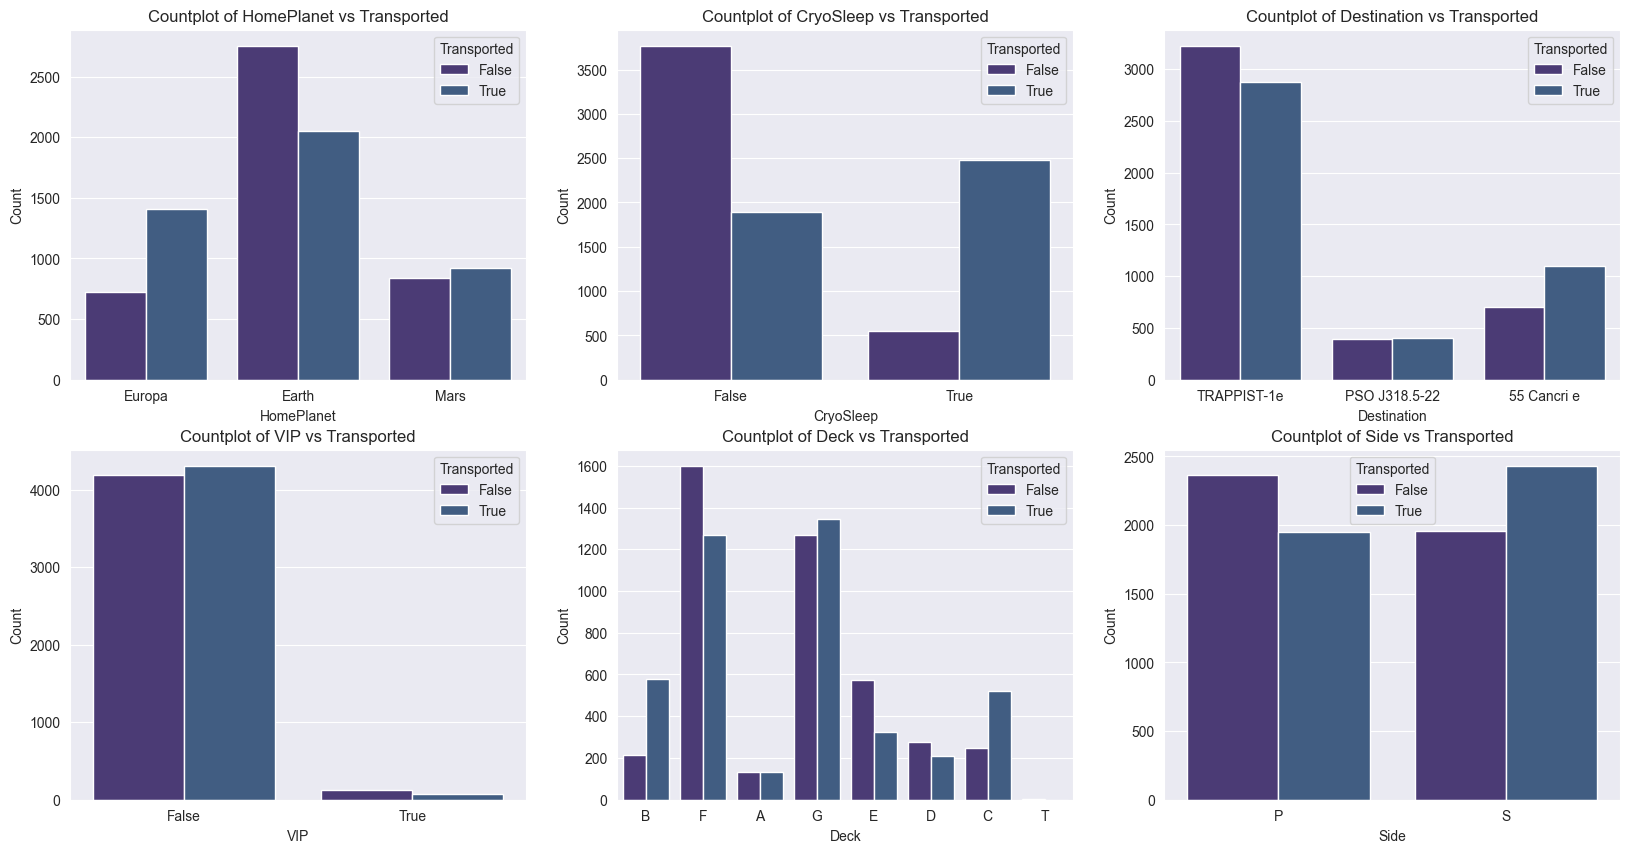

In [20]:
# discrete features
discrete_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

# plotting countplots
sns.set_style('darkgrid')
sns.set_palette('viridis')
plt.figure(figsize=(20, 10))

for i, col in enumerate(discrete_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=train_df, x=col, hue='Transported')
    plt.title(f'Countplot of {col} vs Transported')
    plt.xlabel(col)
    plt.ylabel('Count')

Insight:
<li> I will drop VIP column. This distribution is insignificant

In [21]:
train_df = train_df.drop('VIP', axis=1)
test_df = test_df.drop('VIP', axis=1)

In [22]:
train_df.head(1)

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,False,B,P


In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   HomePlanet    8693 non-null   object
 1   CryoSleep     8693 non-null   bool  
 2   Destination   8693 non-null   object
 3   Age           8693 non-null   object
 4   RoomService   8693 non-null   object
 5   FoodCourt     8693 non-null   object
 6   ShoppingMall  8693 non-null   object
 7   Spa           8693 non-null   object
 8   VRDeck        8693 non-null   object
 9   Transported   8693 non-null   object
 10  Deck          8693 non-null   object
 11  Side          8693 non-null   object
dtypes: bool(1), object(11)
memory usage: 823.5+ KB


In [24]:
test_df.head(1)

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
8693,Earth,True,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,G,S


In [25]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 8693 to 12969
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   HomePlanet    4277 non-null   object
 1   CryoSleep     4277 non-null   bool  
 2   Destination   4277 non-null   object
 3   Age           4277 non-null   object
 4   RoomService   4277 non-null   object
 5   FoodCourt     4277 non-null   object
 6   ShoppingMall  4277 non-null   object
 7   Spa           4277 non-null   object
 8   VRDeck        4277 non-null   object
 9   Deck          4277 non-null   object
 10  Side          4277 non-null   object
dtypes: bool(1), object(10)
memory usage: 371.7+ KB


Next I will perform a one hot enconding on train and test datasets on non binary features
<li> [HomePlanet]
<li> [Destination]
<li> [Deck]

In [26]:
# one hot enconding discretes features
import pandas as pd
one_hot_features = ['HomePlanet', 'Destination', 'Deck', 'Side', 'CryoSleep']

# using get dummies
train_df_encoded = pd.get_dummies(train_df, columns=one_hot_features, drop_first = True, dtype = int)
test_df_encoded = pd.get_dummies(test_df, columns=one_hot_features, drop_first = True, dtype = int)

train_df_encoded.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S,CryoSleep_True
0,39.0,0.0,0.0,0.0,0.0,0.0,False,1,0,0,1,1,0,0,0,0,0,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,0,0,0,1,0,0,0,0,1,0,0,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,1,0,0,1,0,0,0,0,0,0,0,1,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,1,0,0,1,0,0,0,0,0,0,0,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,True,0,0,0,1,0,0,0,0,1,0,0,1,0


In [27]:
train_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        8693 non-null   object
 1   RoomService                8693 non-null   object
 2   FoodCourt                  8693 non-null   object
 3   ShoppingMall               8693 non-null   object
 4   Spa                        8693 non-null   object
 5   VRDeck                     8693 non-null   object
 6   Transported                8693 non-null   object
 7   HomePlanet_Europa          8693 non-null   int64 
 8   HomePlanet_Mars            8693 non-null   int64 
 9   Destination_PSO J318.5-22  8693 non-null   int64 
 10  Destination_TRAPPIST-1e    8693 non-null   int64 
 11  Deck_B                     8693 non-null   int64 
 12  Deck_C                     8693 non-null   int64 
 13  Deck_D                     8693 non-null   int64 
 14  Deck_E       

In [28]:
test_df_encoded.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S,CryoSleep_True
8693,27.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1,0,1,1
8694,19.0,0.0,9.0,0.0,2823.0,0.0,0,0,0,1,0,0,0,0,1,0,0,1,0
8695,31.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,1,1
8696,38.0,0.0,6652.0,0.0,181.0,585.0,1,0,0,1,0,1,0,0,0,0,0,1,0
8697,20.0,10.0,0.0,635.0,0.0,0.0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [29]:
test_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 8693 to 12969
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        4277 non-null   object
 1   RoomService                4277 non-null   object
 2   FoodCourt                  4277 non-null   object
 3   ShoppingMall               4277 non-null   object
 4   Spa                        4277 non-null   object
 5   VRDeck                     4277 non-null   object
 6   HomePlanet_Europa          4277 non-null   int64 
 7   HomePlanet_Mars            4277 non-null   int64 
 8   Destination_PSO J318.5-22  4277 non-null   int64 
 9   Destination_TRAPPIST-1e    4277 non-null   int64 
 10  Deck_B                     4277 non-null   int64 
 11  Deck_C                     4277 non-null   int64 
 12  Deck_D                     4277 non-null   int64 
 13  Deck_E                     4277 non-null   int64 
 14  Deck_F   

Now:
<li> Age to int
<li> Money columns to float

In [30]:
# money columns
money_columns = ['ShoppingMall', 'FoodCourt', 'Spa', 'RoomService', 'VRDeck']

for col in money_columns:
    train_df_encoded[col] = train_df_encoded[col].astype(float)
    test_df_encoded[col] = test_df_encoded[col].astype(float)

In [31]:
# age column
train_df_encoded['Age'] = train_df_encoded['Age'].astype(int)
test_df_encoded['Age'] = test_df_encoded['Age'].astype(int)

In [32]:
train_df_encoded.head(1)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S,CryoSleep_True
0,39,0.0,0.0,0.0,0.0,0.0,False,1,0,0,1,1,0,0,0,0,0,0,0,0


In [33]:
train_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8693 non-null   int64  
 1   RoomService                8693 non-null   float64
 2   FoodCourt                  8693 non-null   float64
 3   ShoppingMall               8693 non-null   float64
 4   Spa                        8693 non-null   float64
 5   VRDeck                     8693 non-null   float64
 6   Transported                8693 non-null   object 
 7   HomePlanet_Europa          8693 non-null   int64  
 8   HomePlanet_Mars            8693 non-null   int64  
 9   Destination_PSO J318.5-22  8693 non-null   int64  
 10  Destination_TRAPPIST-1e    8693 non-null   int64  
 11  Deck_B                     8693 non-null   int64  
 12  Deck_C                     8693 non-null   int64  
 13  Deck_D                     8693 non-null   int64  
 1

In [34]:
# transported to int
train_df_encoded['Transported'] = train_df_encoded['Transported'].astype(int)
train_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8693 non-null   int64  
 1   RoomService                8693 non-null   float64
 2   FoodCourt                  8693 non-null   float64
 3   ShoppingMall               8693 non-null   float64
 4   Spa                        8693 non-null   float64
 5   VRDeck                     8693 non-null   float64
 6   Transported                8693 non-null   int64  
 7   HomePlanet_Europa          8693 non-null   int64  
 8   HomePlanet_Mars            8693 non-null   int64  
 9   Destination_PSO J318.5-22  8693 non-null   int64  
 10  Destination_TRAPPIST-1e    8693 non-null   int64  
 11  Deck_B                     8693 non-null   int64  
 12  Deck_C                     8693 non-null   int64  
 13  Deck_D                     8693 non-null   int64  
 1

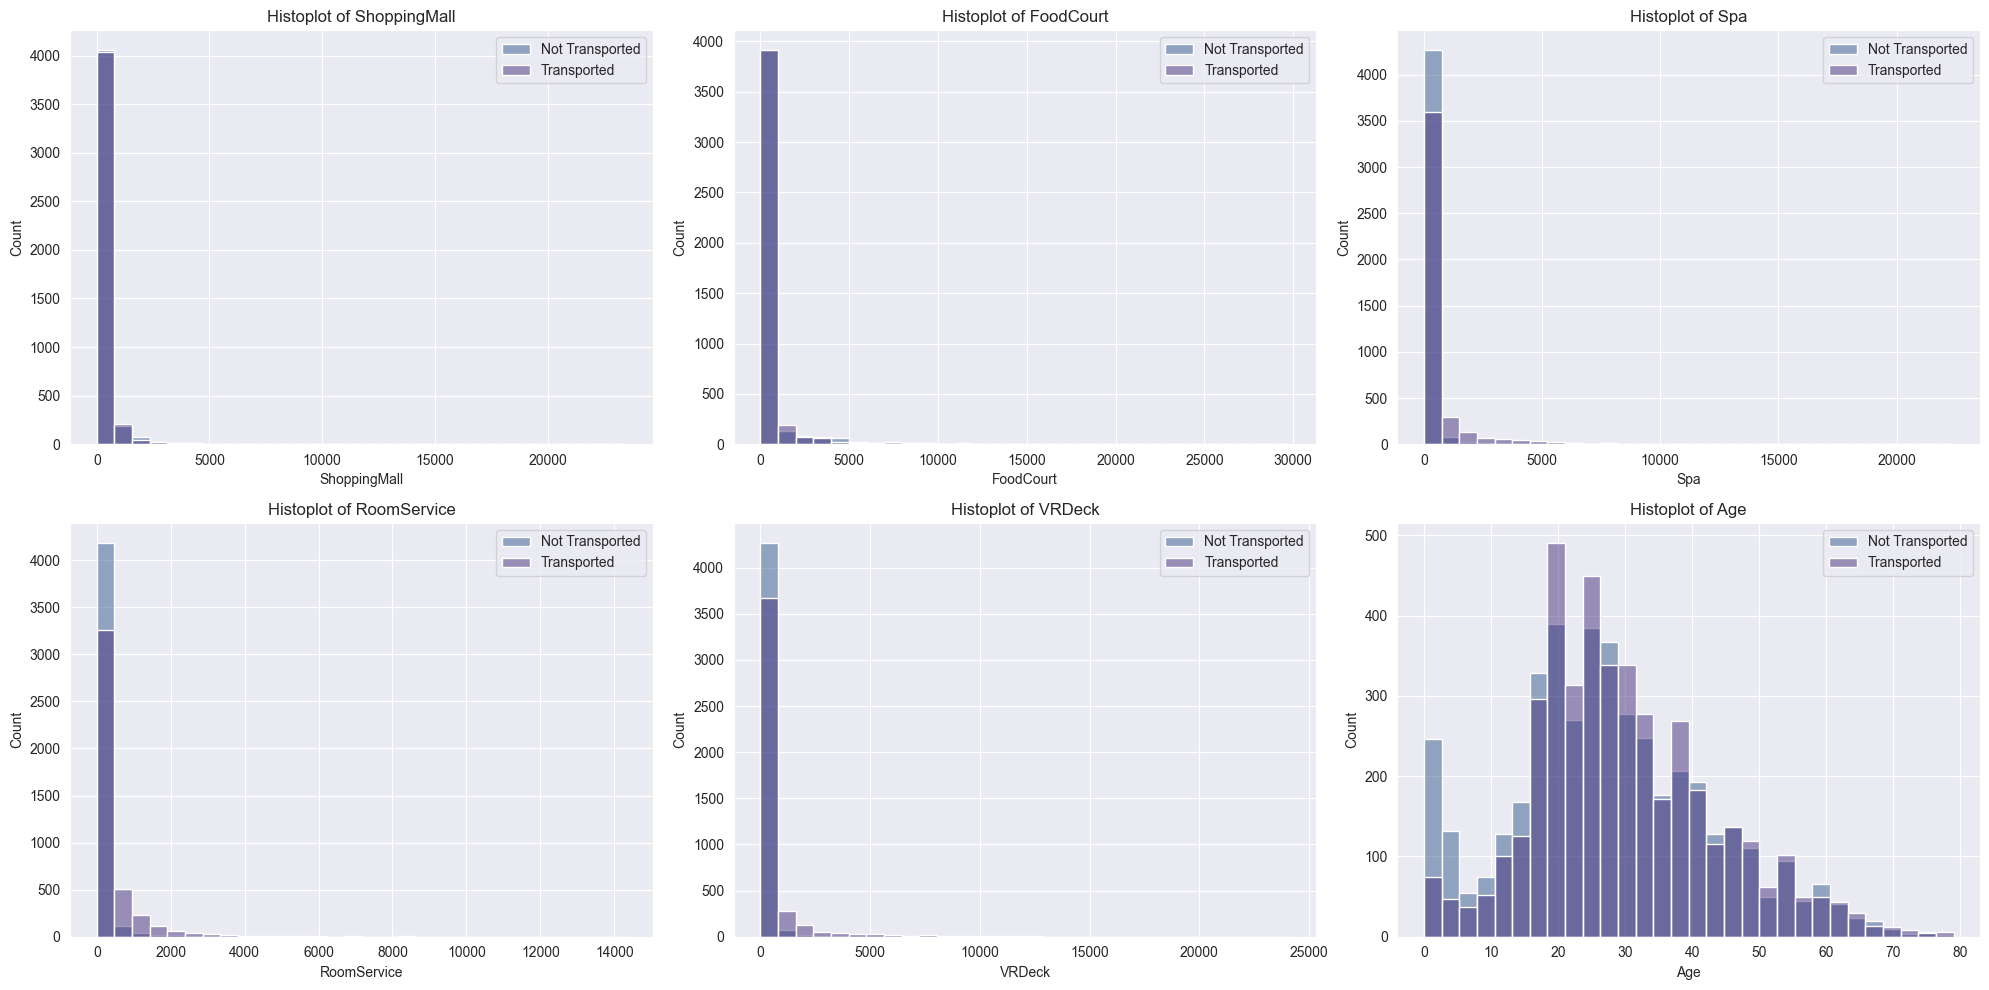

In [43]:
# continuous features
continuous_features = ['ShoppingMall', 'FoodCourt', 'Spa', 'RoomService', 'VRDeck', 'Age']

# plotting countplots
sns.set_style('darkgrid')
sns.set_palette('viridis')
plt.figure(figsize=(20, 10))

for i, col in enumerate(continuous_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=train_df_encoded, x=col, hue='Transported', bins = 30, kde = False)
    plt.title(f'Histoplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(loc = 'upper right', labels = ['Not Transported', 'Transported'])

plt.tight_layout()
plt.show()

Here we can see expendure (or money) features and age. 
<br>Insight:
<li> I will create 2 features. Total expendure,to remove colinearity, and a binary feature to indicate if the person has spent money or not

In [46]:
# creating total expendure column
train_df_encoded['total_expendure'] = train_df_encoded[money_columns].sum(axis=1)
test_df_encoded['total_expendure'] = test_df_encoded[money_columns].sum(axis=1)

# dropping 'money columns' from the dataset
train_df_encoded.drop(columns=money_columns, inplace=True)
test_df_encoded.drop(columns=money_columns, inplace=True)

train_df_encoded.head()

,Age,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S,CryoSleep_True,total_expendure
0,39,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0.0
1,24,1,0,0,0,1,0,0,0,0,1,0,0,1,0,736.0
2,58,0,1,0,0,1,0,0,0,0,0,0,0,1,0,10383.0
3,33,0,1,0,0,1,0,0,0,0,0,0,0,1,0,5176.0
4,16,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1091.0


In [48]:
train_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8693 non-null   int64  
 1   Transported                8693 non-null   int64  
 2   HomePlanet_Europa          8693 non-null   int64  
 3   HomePlanet_Mars            8693 non-null   int64  
 4   Destination_PSO J318.5-22  8693 non-null   int64  
 5   Destination_TRAPPIST-1e    8693 non-null   int64  
 6   Deck_B                     8693 non-null   int64  
 7   Deck_C                     8693 non-null   int64  
 8   Deck_D                     8693 non-null   int64  
 9   Deck_E                     8693 non-null   int64  
 10  Deck_F                     8693 non-null   int64  
 11  Deck_G                     8693 non-null   int64  
 12  Deck_T                     8693 non-null   int64  
 13  Side_S                     8693 non-null   int64  
 1

In [47]:
test_df_encoded.head()

,Age,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S,CryoSleep_True,total_expendure
8693,27,0,0,0,1,0,0,0,0,0,1,0,1,1,0.0
8694,19,0,0,0,1,0,0,0,0,1,0,0,1,0,2832.0
8695,31,1,0,0,0,0,1,0,0,0,0,0,1,1,0.0
8696,38,1,0,0,1,0,1,0,0,0,0,0,1,0,7418.0
8697,20,0,0,0,1,0,0,0,0,1,0,0,1,0,645.0


In [49]:
test_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 8693 to 12969
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        4277 non-null   int64  
 1   HomePlanet_Europa          4277 non-null   int64  
 2   HomePlanet_Mars            4277 non-null   int64  
 3   Destination_PSO J318.5-22  4277 non-null   int64  
 4   Destination_TRAPPIST-1e    4277 non-null   int64  
 5   Deck_B                     4277 non-null   int64  
 6   Deck_C                     4277 non-null   int64  
 7   Deck_D                     4277 non-null   int64  
 8   Deck_E                     4277 non-null   int64  
 9   Deck_F                     4277 non-null   int64  
 10  Deck_G                     4277 non-null   int64  
 11  Deck_T                     4277 non-null   int64  
 12  Side_S                     4277 non-null   int64  
 13  CryoSleep_True             4277 non-null   int64 

In [ ]:
# creating binary had_expenditure column
train_df_encoded['had_expenditure'] = (train_df_encoded['total_expendure'] > 0).astype(int)
test_df_encoded['had_expenditure'] = (test_df_encoded['total_expendure'] > 0).astype(int)

train_df_encoded.head()

,Age,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S,CryoSleep_True,total_expendure,had_expenditure
0,39,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0.0,0
1,24,1,0,0,0,1,0,0,0,0,1,0,0,1,0,736.0,1
2,58,0,1,0,0,1,0,0,0,0,0,0,0,1,0,10383.0,1
3,33,0,1,0,0,1,0,0,0,0,0,0,0,1,0,5176.0,1
4,16,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1091.0,1


In [51]:
train_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8693 non-null   int64  
 1   Transported                8693 non-null   int64  
 2   HomePlanet_Europa          8693 non-null   int64  
 3   HomePlanet_Mars            8693 non-null   int64  
 4   Destination_PSO J318.5-22  8693 non-null   int64  
 5   Destination_TRAPPIST-1e    8693 non-null   int64  
 6   Deck_B                     8693 non-null   int64  
 7   Deck_C                     8693 non-null   int64  
 8   Deck_D                     8693 non-null   int64  
 9   Deck_E                     8693 non-null   int64  
 10  Deck_F                     8693 non-null   int64  
 11  Deck_G                     8693 non-null   int64  
 12  Deck_T                     8693 non-null   int64  
 13  Side_S                     8693 non-null   int64  
 1

In [52]:
test_df_encoded.head()

,Age,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S,CryoSleep_True,total_expendure,had_expenditure
8693,27,0,0,0,1,0,0,0,0,0,1,0,1,1,0.0,0
8694,19,0,0,0,1,0,0,0,0,1,0,0,1,0,2832.0,1
8695,31,1,0,0,0,0,1,0,0,0,0,0,1,1,0.0,0
8696,38,1,0,0,1,0,1,0,0,0,0,0,1,0,7418.0,1
8697,20,0,0,0,1,0,0,0,0,1,0,0,1,0,645.0,1


In [53]:
test_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 8693 to 12969
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        4277 non-null   int64  
 1   HomePlanet_Europa          4277 non-null   int64  
 2   HomePlanet_Mars            4277 non-null   int64  
 3   Destination_PSO J318.5-22  4277 non-null   int64  
 4   Destination_TRAPPIST-1e    4277 non-null   int64  
 5   Deck_B                     4277 non-null   int64  
 6   Deck_C                     4277 non-null   int64  
 7   Deck_D                     4277 non-null   int64  
 8   Deck_E                     4277 non-null   int64  
 9   Deck_F                     4277 non-null   int64  
 10  Deck_G                     4277 non-null   int64  
 11  Deck_T                     4277 non-null   int64  
 12  Side_S                     4277 non-null   int64  
 13  CryoSleep_True             4277 non-null   int64 

All featurs now are numerical. I may consider scaling techniques during altorithm evaluation.

Now I will export the train and test datasets to explore different algorithms in different notebooks.

In [54]:
train_df_encoded.to_pickle('train_df_encoded.pkl')
test_df_encoded.to_pickle('test_df_encoded.pkl')